<a href="https://colab.research.google.com/github/SerotoninShane/WGU-Capstone/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving books.csv to books (15).csv


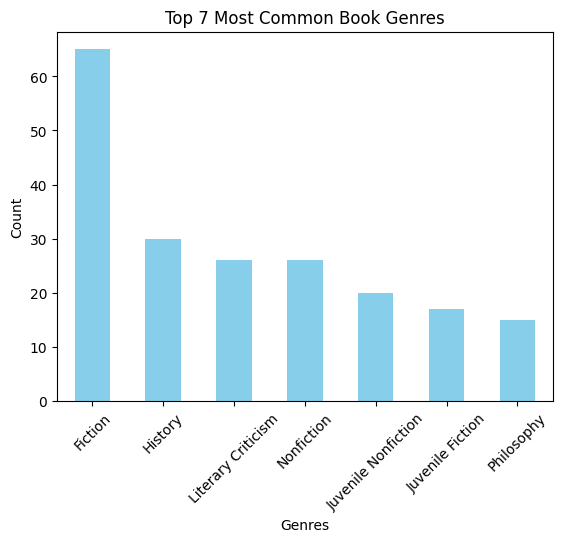

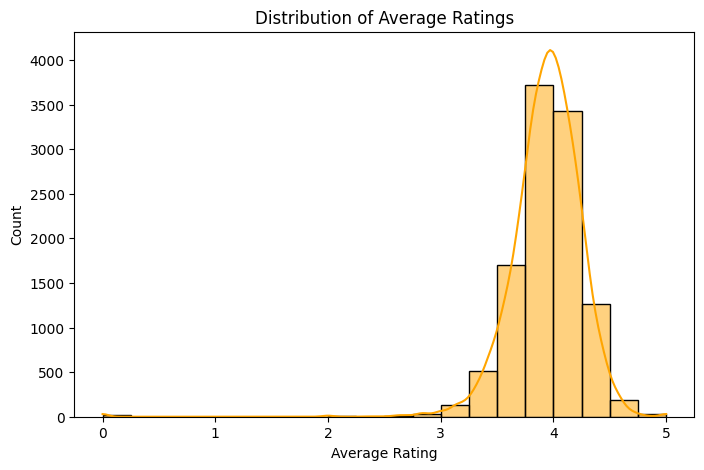

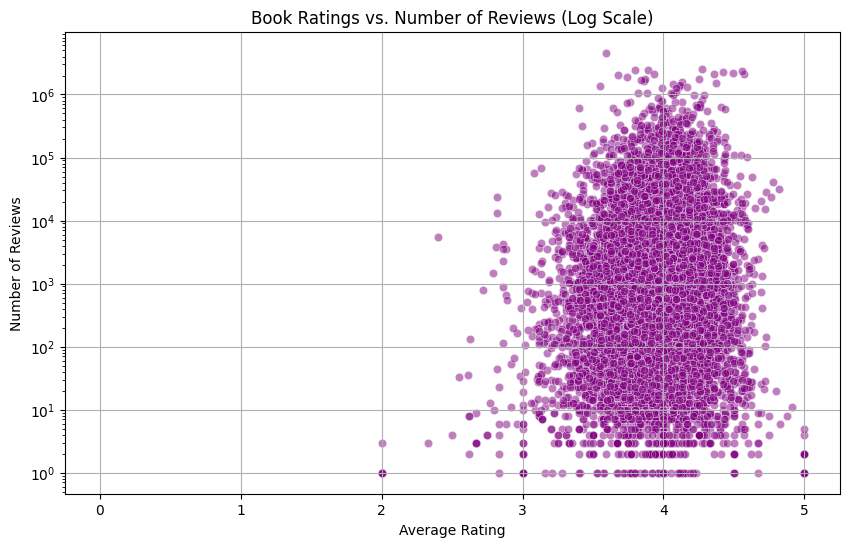

Cluster 0 Top Genres:
Classics;Fiction;Romance;Historical                              10
Historical Fiction;Literature;Historical;Audiobook;Literature    10
19th Century;Classics                                            10
Classic Literature;European Literature                            6
British Literature                                                6
Name: count, dtype: int64
------------------------------
Cluster 1 Top Genres:
Sequential Art        464
Historical            314
Fiction;Historical    232
20th Century          190
British Literature    176
Name: count, dtype: int64
------------------------------
Cluster 2 Top Genres:
Classics;Fiction;Romance;Historical                         5
Historical Fiction;Literature;Classics                      5
Classic Literature;Historical;European Literature           4
British Literature;Novels;Anthologies                       4
Classic Literature;Historical;Novels;European Literature    1
Name: count, dtype: int64
--------------

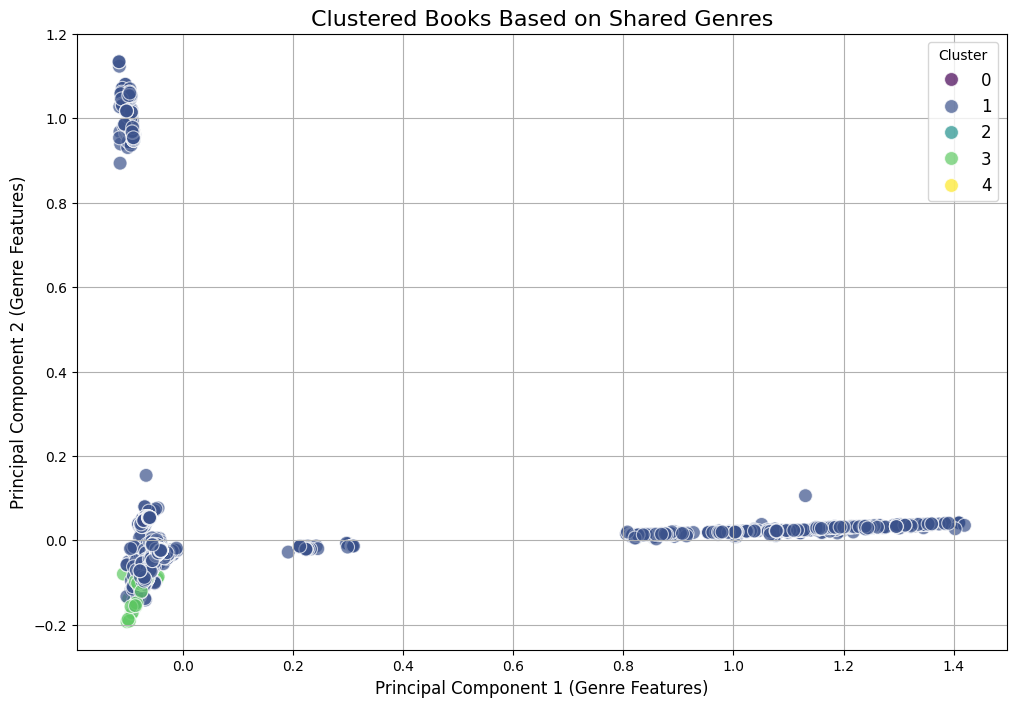

Top Genres for PC1 (Most Significant Genres in Principal Component 1):
Sequential Art                           0.849695
Comics;Sequential Art                    0.336017
Graphic Novels;Sequential Art            0.250803
Manga;Fantasy;Sequential Art             0.175704
Manga;Sequential Art                     0.143376
Graphic Novels;Superheroes               0.071357
Shonen                                   0.056287
Manga;Manga                              0.053433
Superheroes;Comics                       0.040331
Graphic Novels;Fantasy;Sequential Art    0.034842
Name: PC1, dtype: float64

Top Genres for PC2 (Most Significant Genres in Principal Component 2):
Historical                                                           0.968139
Historical Fiction;Fiction;Cultural                                  0.098960
British Literature                                                   0.075932
Historical Fiction;Fiction;Historical;Cultural                       0.043999
Sequential Art     

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset (Update the file path accordingly)
from google.colab import files
uploaded = files.upload()

# Read CSV file
df = pd.read_csv(next(iter(uploaded)))

# Ensure numeric columns are properly converted
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["ratings_count"] = pd.to_numeric(df["ratings_count"], errors="coerce")

# Drop missing values
df_cleaned = df.dropna(subset=["average_rating", "ratings_count", "genres"])

# Top 7 Most Common Book Genres
df_filtered = df_cleaned[df_cleaned["genres"].notna() & (df_cleaned["genres"].str.strip() != '')]
df_filtered["genres"].value_counts().head(7).plot(kind="bar", color="skyblue")
plt.title("Top 7 Most Common Book Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Distribution of Average Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["average_rating"], bins=20, kde=True, color="orange")
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

# Log-Scale Scatter Plot: Ratings vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="average_rating", y="ratings_count", alpha=0.5, color="purple")
plt.title("Book Ratings vs. Number of Reviews (Log Scale)")
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.yscale("log")
plt.grid(True)
plt.show()

# Ensure genres are in list form
df["genres"] = df["genres"].astype(str).str.split(",")

# One-hot encode the genres
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df["genres"])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change n_clusters as needed
df["Cluster"] = kmeans.fit_predict(genre_matrix)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(genre_matrix)

# Create DataFrame for PCA results
df_pca = pd.DataFrame(pca_results, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=100, alpha=0.7)

# Title and axis labels
plt.title("Clustered Books Based on Shared Genres", fontsize=16)
plt.xlabel("Principal Component 1 (Genre Features)", fontsize=12)
plt.ylabel("Principal Component 2 (Genre Features)", fontsize=12)

# Identify common genres in each cluster
for i in range(kmeans.n_clusters):
    # Get the books in the current cluster
    cluster_books = df[df["Cluster"] == i]

    # Find the top genres for this cluster
    all_genres = [genre for genres in cluster_books["genres"] for genre in genres]
    genre_counts = pd.Series(all_genres).value_counts().head(5)  # Top 5 genres
    print(f"Cluster {i} Top Genres:")
    print(genre_counts)
    print("-" * 30)

# Show the plot
plt.legend(title="Cluster", loc="best", fontsize=12)
plt.grid(True)
plt.show()

# ------------ Analyze Component Loadings ------------
# Get the component loadings (genres' contribution to each principal component)
loadings = pd.DataFrame(pca.components_, columns=mlb.classes_, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Sort the loadings for PC1 and PC2 to see which genres are most significant
pc1_loadings = loadings.loc['PC1'].sort_values(ascending=False)
pc2_loadings = loadings.loc['PC2'].sort_values(ascending=False)

# Display the top genres for PC1 and PC2
print("Top Genres for PC1 (Most Significant Genres in Principal Component 1):")
print(pc1_loadings.head(10))
print("\nTop Genres for PC2 (Most Significant Genres in Principal Component 2):")
print(pc2_loadings.head(10))